# PROBLEM 9: Calibration and Prediction

### Part b
_A source of contamination has been discovered in the northeastern comer of the aquifer. At the same time an industry is trying to gain permission to pump_ [groundwater](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#g) _from a well located at row 13, column 4 of the modeled area. What is the maximum_ [pumping rate](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#p) _that should be allowed to prevent the industry from contaminating its own water supply?_

### Table 9.1: River Data

| Row | Column | Stage (ft) | Bottom Elevation (ft) |
|-----|--------|------------|-----------------------|
| 4   | 1      | 100        | 90                    |
| 4   | 2      | 100        | 90                    |
| 4   | 3      | 100        | 90                    |
| 4   | 4      | 99         | 89                    |
| 4   | 5      | 99         | 89                    |
| 5   | 6      | 98         | 88                    |
| 6   | 7      | 97         | 86                    |
| 7   | 8      | 96         | 86                    |
| 8   | 9      | 95         | 85                    |
| 9   | 10     | 94         | 84                    |
| 9   | 11     | 94         | 84                    |
| 9   | 12     | 94         | 84                    |
| 9   | 13     | 94         | 84                    |
| 9   | 14     | 93         | 83                    |
| 9   | 15     | 93         | 83                    |

### Table 9.2: Calibration Targets

| Row | Column | Head (ft) |
|-----|--------|-----------|
| 14  | 1      | 124       |
| 11  | 4      | 119.9     |
| 13  | 13     | 113.9     |
| 8   | 1      | 116.1     |
| 4   | 12     | 113       |
| 9   | 6      | 114       |
| 2   | 3      | 108.5     |
| 11  | 10     | 111.7     |
| 7   | 14     | 107.6     |
| 3   | 8      | 111.3     |
| 2   | 15     | 115.6     |

In [122]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import flopy
#import csv

In [123]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/problem9_grid_data.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0]


# MODEL OUTPUT

## _Figure 9.3. Hydraulic head arrays, potentiometric surface contour maps, and mass balance summary for Part b using pumpage of -0.4 $\frac{ft^3}{s}$._

In [124]:
#Flopy objects
modelname = 'p9_pb' #short for problem 9 part b
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

#dis package
#call in the discretization package
nlay = 1
nrow = 15
ncol = 15
delr = 500
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 86400. #length of stress period
tsmult = 11 #time step multiplier
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

#wel package
pr = .4 #pumping rate
wel_sp = [[0, 12, 3, -pr]]
stress_period_data = {0: wel_sp}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

#pcg package
pcg = flopy.modflow.ModflowPcg(mf)

#lpf package
laytyp = np.zeros((nlay))
hk = .01
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, laytyp=laytyp)

#oc package
oc = flopy.modflow.ModflowOc(mf)

#riv package
ipakcb = 0

#create .csv file of the river data
riv_boundary = pd.read_csv('../Data/problem9_riv.csv')
#subtract 1 so that the layer, row, and col match up with pythons rules
riv_boundary.layer -=1
riv_boundary.row -=1
riv_boundary.col -=1
print(riv_boundary.values)

riv_spd = {0: riv_boundary.values}
          
riv = flopy.modflow.ModflowRiv(mf, ipakcb=ipakcb, stress_period_data=riv_spd)

print(riv_sp)

#rch package
rech = .2e-7
rch = flopy.modflow.ModflowRch(mf, rech=rech)

# Write the MODFLOW model input files
mf.write_input()

# Run the MODFLOW model
success, buff = mf.run_model()

[[  0.00000000e+00   3.00000000e+00   0.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   1.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   2.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   3.00000000e+00   9.90000000e+01
    1.00000000e-02   8.90000000e+01]
 [  0.00000000e+00   3.00000000e+00   4.00000000e+00   9.90000000e+01
    1.00000000e-02   8.90000000e+01]
 [  0.00000000e+00   4.00000000e+00   5.00000000e+00   9.80000000e+01
    1.00000000e-02   8.80000000e+01]
 [  0.00000000e+00   5.00000000e+00   6.00000000e+00   9.70000000e+01
    1.00000000e-02   8.70000000e+01]
 [  0.00000000e+00   6.00000000e+00   7.00000000e+00   9.60000000e+01
    1.00000000e-02   8.60000000e+01]
 [  0.00000000e+00   7.00000000e+00   8.00000000e+00   9.50000000e+01
    1.00000000e-02   8.50000000e+01]
 [  0.00000000e+00   8.00000000e+00  

In [125]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p9_pb.hds') #"os.path.join" joins together the model_ws and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head (Table 14.2)
ts = headobj.get_ts([[0, 12, 3]])
print(ts)

[86400.0]
[[  8.64000000e+04   6.76777039e+01]]


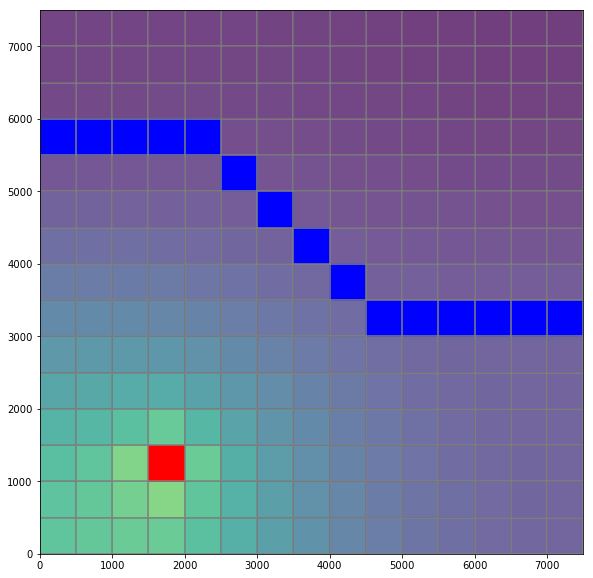

In [136]:
#shows the drawdown at each well 
fname = os.path.join(modelname, 'p9_pb.cbc')
head = 0-headobj.get_data(totim=times[-1])
levels = np.arange(0, 5, .1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
quadmesh = modelmap.plot_array(head, masked_values=[999.], alpha=0.5) #adds the coloration to the map
modelmap.plot_bc("WEL")
modelmap.plot_bc("RIV", color='b')
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[-999.], levels=levels)

<a list of 6 text.Text objects>

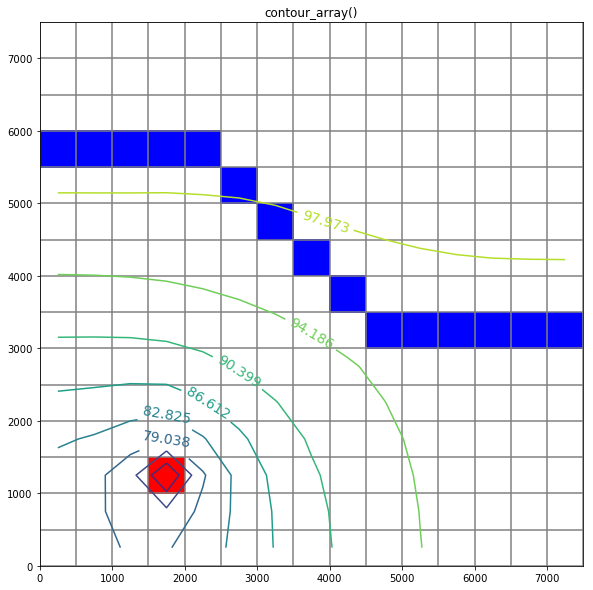

In [127]:
fname = os.path.join(modelname, 'p9_pa.cbc')
head = headobj.get_data(totim=times[-1])
levels = np.linspace(head.min(), head.max(), 10)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.set_title('contour_array()')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
modelmap.plot_bc("WEL") #red squares on map
modelmap.plot_bc("RIV", color='b') #blue squares on map
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[999.], levels=levels) #creates contour lines
plt.clabel(contour_set, inline=1, fontsize=14) #displays the numerical values to the contour lines

# DISCUSSION OF RESULTS

_The first step in this problem is to perform the steady state history match or calibration. One could attempt to calibrate the model by trying various combinations of T and R until a match was achieved. This would be costly, time consuming, and would not ensure that the right combination of T and R had been used (see Problem 6)._

_The modeler should realize that the only discharge is to the river and the only source is recharge. Therefore, to be in steady state, these two must balance. Recharge must therefore equal 1.125 cfs (the river gain equals 11.125 cfs - 10 cfs). Spreading over the modeled area:_

$$\frac{1.125{ft^3}{s}}{(15x15)\cdot(500ft\cdot500ft)} = {2x10^8\frac{ft}{s}}$$

_Since recharge is now known, we must calibrate by varying transmissivity. A first cut estimate of transmissivity can be obtained by recognizing that flow to the river is known, as is the gradient. Assuming that flow from northeastern corner is slightly less than one half (0.5_ $\frac{ft^3}{s}$) _the total flow, we can write Darcy’s law as:_

$${q=kia}$$

$${0.5\frac{ft^3}{s}} = {k\frac{8}{2500}(b)(length of river)}$$

$${kb = T = \frac{0.5\cdot2500}{8\cdot7500} = 0.021\frac{ft^2}{s}}$$ 

_This first cut estimate will not match the steady state distribution. Further adjustment yields T = 0.01 $\frac{ft^2}{s}$._

_A trial and error procedure is used to compute the allowable discharge from the well. It should be obvious that the answer must be somewhere between 0.0 cfs and 1.125 cfs. Figure 9.4 shows the results of an 0.1 cfs simulation, which hardly is noticeable. Figure 9.5 shows a 0.5 cfs simulation, where all flow is toward the well. Finally, using a discharge of 0.4 cfs, a slight ridge forms near the river. These results are presented as the maximum allowable discharge shown in Figure 9.3. Using an optimization package a maximum rate of 0.42 cfs was obtained for this problem._

_This is a highly idealized problem where many assumptions have been made. Some of the assumptions particular to this problem include:_

1) The river discharge measurements are precise and do not change with time.

2) The system is in a steady state condition where heads and thus the magnitude and location of the “ridge” do not change with time.

3) The river characteristics, conductance and stage, are precisely known.

4) The no-flow boundaries surrounding the model are true hydrologic features (aquifer extent or pinchout) and do not change upon imposition of the stress.

_Note that these assumptions would be violated in most practical situations. A “factor of safety” has not been built in to the calculation of permissible withdrawal. A sensitivity analysis would be required to assess parameter uncertainty and ramifications of modeling assumptions. A more rigorous analysis than the one performed for this demonstration problem would probably need to be conducted for a real world problem with similar contamination potential._


## _Figure 9.4. Potentiometric surface contour map for Part b using pumpage of -0.1 $\frac{ft^3}{s}$._

In [128]:
#Flopy objects
modelname = 'p9_pb' #short for problem 9 part b
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

#dis package
#call in the discretization package
nlay = 1
nrow = 15
ncol = 15
delr = 500
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 86400. #length of stress period
tsmult = 11 #time step multiplier
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

#wel package
pr = .1 #pumping rate
wel_sp = [[0, 12, 3, -pr]]
stress_period_data = {0: wel_sp}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

#pcg package
pcg = flopy.modflow.ModflowPcg(mf)

#lpf package
laytyp = np.zeros((nlay))
hk = .01
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, laytyp=laytyp)

#oc package
oc = flopy.modflow.ModflowOc(mf)

#riv package
ipakcb = 0
#create .csv file of the river data
riv_boundary = pd.read_csv('../Data/problem9_riv.csv')
#subtract 1 so that the layer, row, and col match up with pythons rules
riv_boundary.layer -=1
riv_boundary.row -=1
riv_boundary.col -=1
print(riv_boundary.values)

riv_spd = {0: riv_boundary.values}
riv = flopy.modflow.ModflowRiv(mf, ipakcb=ipakcb, stress_period_data=riv_spd)

print(riv_sp)

#rch package
rech = .2e-7
rch = flopy.modflow.ModflowRch(mf, rech=rech)

# Write the MODFLOW model input files
mf.write_input()

# Run the MODFLOW model
success, buff = mf.run_model()

[[  0.00000000e+00   3.00000000e+00   0.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   1.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   2.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   3.00000000e+00   9.90000000e+01
    1.00000000e-02   8.90000000e+01]
 [  0.00000000e+00   3.00000000e+00   4.00000000e+00   9.90000000e+01
    1.00000000e-02   8.90000000e+01]
 [  0.00000000e+00   4.00000000e+00   5.00000000e+00   9.80000000e+01
    1.00000000e-02   8.80000000e+01]
 [  0.00000000e+00   5.00000000e+00   6.00000000e+00   9.70000000e+01
    1.00000000e-02   8.70000000e+01]
 [  0.00000000e+00   6.00000000e+00   7.00000000e+00   9.60000000e+01
    1.00000000e-02   8.60000000e+01]
 [  0.00000000e+00   7.00000000e+00   8.00000000e+00   9.50000000e+01
    1.00000000e-02   8.50000000e+01]
 [  0.00000000e+00   8.00000000e+00  

In [129]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p9_pb.hds') #"os.path.join" joins together the model_ws and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head (Table 14.2)
ts = headobj.get_ts([[0, 12, 3]])
print(ts)

[86400.0]
[[ 86400.             96.83886719]]


<a list of 0 text.Text objects>

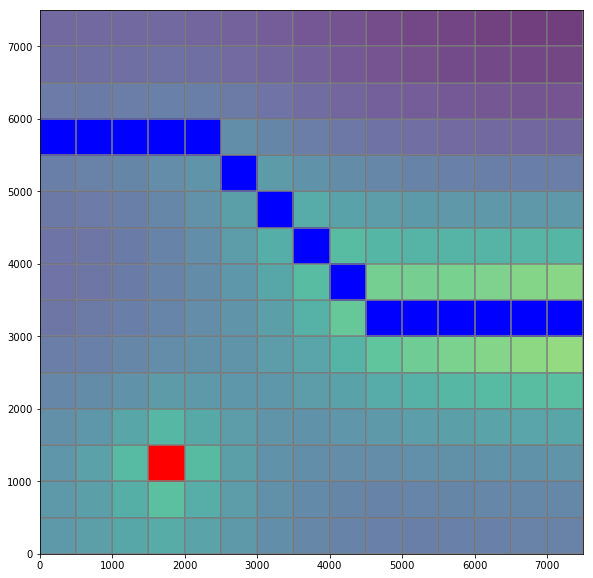

In [130]:
#shows the drawdown at each well 
fname = os.path.join(modelname, 'p9_pb.cbc')
head = 0-headobj.get_data(totim=times[-1])
levels = np.arange(0, 5, .1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
quadmesh = modelmap.plot_array(head, masked_values=[999.], alpha=0.5)
modelmap.plot_bc("WEL")
modelmap.plot_bc("RIV", color='b')
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[-999.], levels=levels)

<a list of 12 text.Text objects>

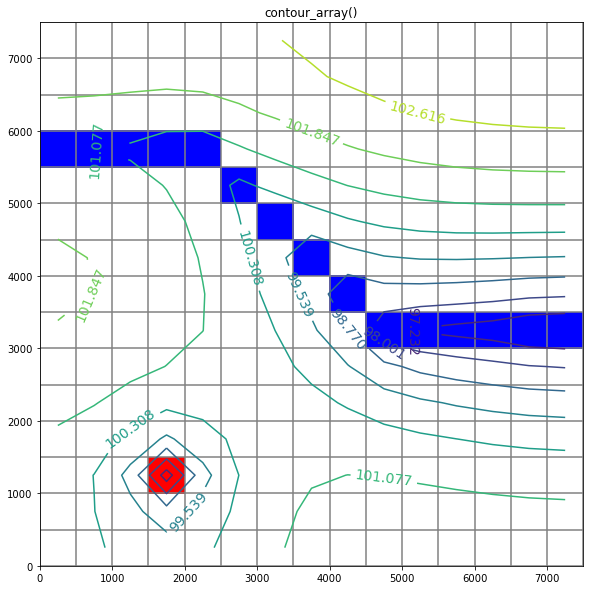

In [131]:
fname = os.path.join(modelname, 'p9_pa.cbc')
head = headobj.get_data(totim=times[-1])
levels = np.linspace(head.min(), head.max(), 10)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.set_title('contour_array()')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
modelmap.plot_bc("WEL") #red squares on map
modelmap.plot_bc("RIV", color='b') #blue squares on map
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[999.], levels=levels) #creates contour lines
plt.clabel(contour_set, inline=1, fontsize=14) #displays the numerical values to the contour lines

## _Figure 9.5. Potentiometric surface contour map for Part b using pumpage of -0.5 $\frac{ft^3}{s}$._

In [132]:
#Flopy objects
modelname = 'p9_pb' #short for problem 9 part b
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

#dis package
#call in the discretization package
nlay = 1
nrow = 15
ncol = 15
delr = 500
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 86400. #length of stress period
tsmult = 11 #time step multiplier
dis = flopy.modflow.ModflowDis(mf, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

#wel package
pr = .5 #pumping rate
wel_sp = [[0, 12, 3, -pr]]
stress_period_data = {0: wel_sp}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

#pcg package
pcg = flopy.modflow.ModflowPcg(mf)

#lpf package
laytyp = np.zeros((nlay))
hk = .01
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, laytyp=laytyp)

#oc package
oc = flopy.modflow.ModflowOc(mf)

#riv package
ipakcb = 0
#create .csv file of the river data
riv_boundary = pd.read_csv('../Data/problem9_riv.csv')
#subtract 1 so that the layer, row, and col match up with pythons rules
riv_boundary.layer -=1
riv_boundary.row -=1
riv_boundary.col -=1
print(riv_boundary.values)

riv_spd = {0: riv_boundary.values}
riv = flopy.modflow.ModflowRiv(mf, ipakcb=ipakcb, stress_period_data=riv_spd)

print(riv_sp)

#rch package
rech = .2e-7
rch = flopy.modflow.ModflowRch(mf, rech=rech)

# Write the MODFLOW model input files
mf.write_input()

# Run the MODFLOW model
success, buff = mf.run_model()

[[  0.00000000e+00   3.00000000e+00   0.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   1.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   2.00000000e+00   1.00000000e+02
    1.00000000e-02   9.00000000e+01]
 [  0.00000000e+00   3.00000000e+00   3.00000000e+00   9.90000000e+01
    1.00000000e-02   8.90000000e+01]
 [  0.00000000e+00   3.00000000e+00   4.00000000e+00   9.90000000e+01
    1.00000000e-02   8.90000000e+01]
 [  0.00000000e+00   4.00000000e+00   5.00000000e+00   9.80000000e+01
    1.00000000e-02   8.80000000e+01]
 [  0.00000000e+00   5.00000000e+00   6.00000000e+00   9.70000000e+01
    1.00000000e-02   8.70000000e+01]
 [  0.00000000e+00   6.00000000e+00   7.00000000e+00   9.60000000e+01
    1.00000000e-02   8.60000000e+01]
 [  0.00000000e+00   7.00000000e+00   8.00000000e+00   9.50000000e+01
    1.00000000e-02   8.50000000e+01]
 [  0.00000000e+00   8.00000000e+00  

In [133]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p9_pb.hds') #"os.path.join" joins together the model_ws and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head (Table 14.2)
ts = headobj.get_ts([[0, 12, 3]])
print(ts)

[86400.0]
[[  8.64000000e+04   5.79573212e+01]]


<a list of 0 text.Text objects>

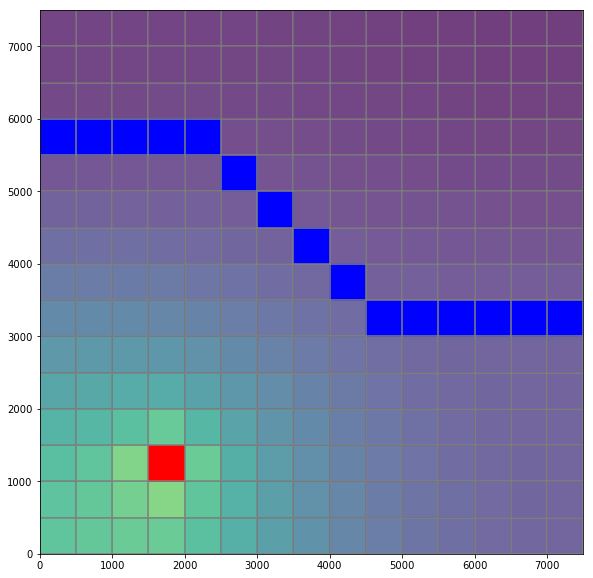

In [134]:
#shows the drawdown at each well 
fname = os.path.join(modelname, 'p9_pb.cbc')
head = 0-headobj.get_data(totim=times[-1])
levels = np.arange(-10, 10, 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
quadmesh = modelmap.plot_array(head, masked_values=[999.], alpha=0.5)
modelmap.plot_bc("WEL")
modelmap.plot_bc("RIV", color='b')
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[-999.], levels=levels)

<a list of 6 text.Text objects>

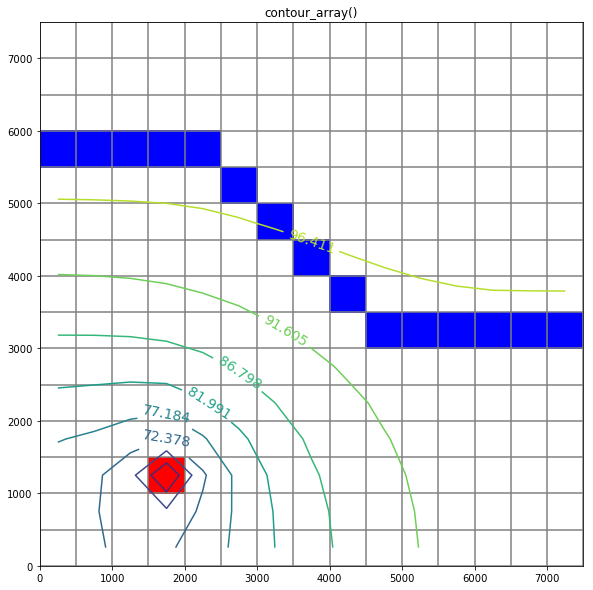

In [135]:
fname = os.path.join(modelname, 'p9_pa.cbc')
head = headobj.get_data(totim=times[-1])
levels = np.linspace(head.min(), head.max(), 10)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.set_title('contour_array()')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
modelmap.plot_bc("WEL") #red squares on map
modelmap.plot_bc("RIV", color='b') #blue squares on map
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[999.], levels=levels) #creates contour lines
plt.clabel(contour_set, inline=1, fontsize=14) #displays the numerical values to the contour lines